# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [48]:
df = pd.read_csv('data/nndb_flat.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [50]:
df.drop(columns='ID', inplace= True)

In [51]:
df

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,0.00,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,5.41,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,73.14,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,2.00,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [54]:
sns.__version__

'0.12.2'

C:\Users\misla\AppData\Local\Temp\ipykernel_17480\815662353.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True);


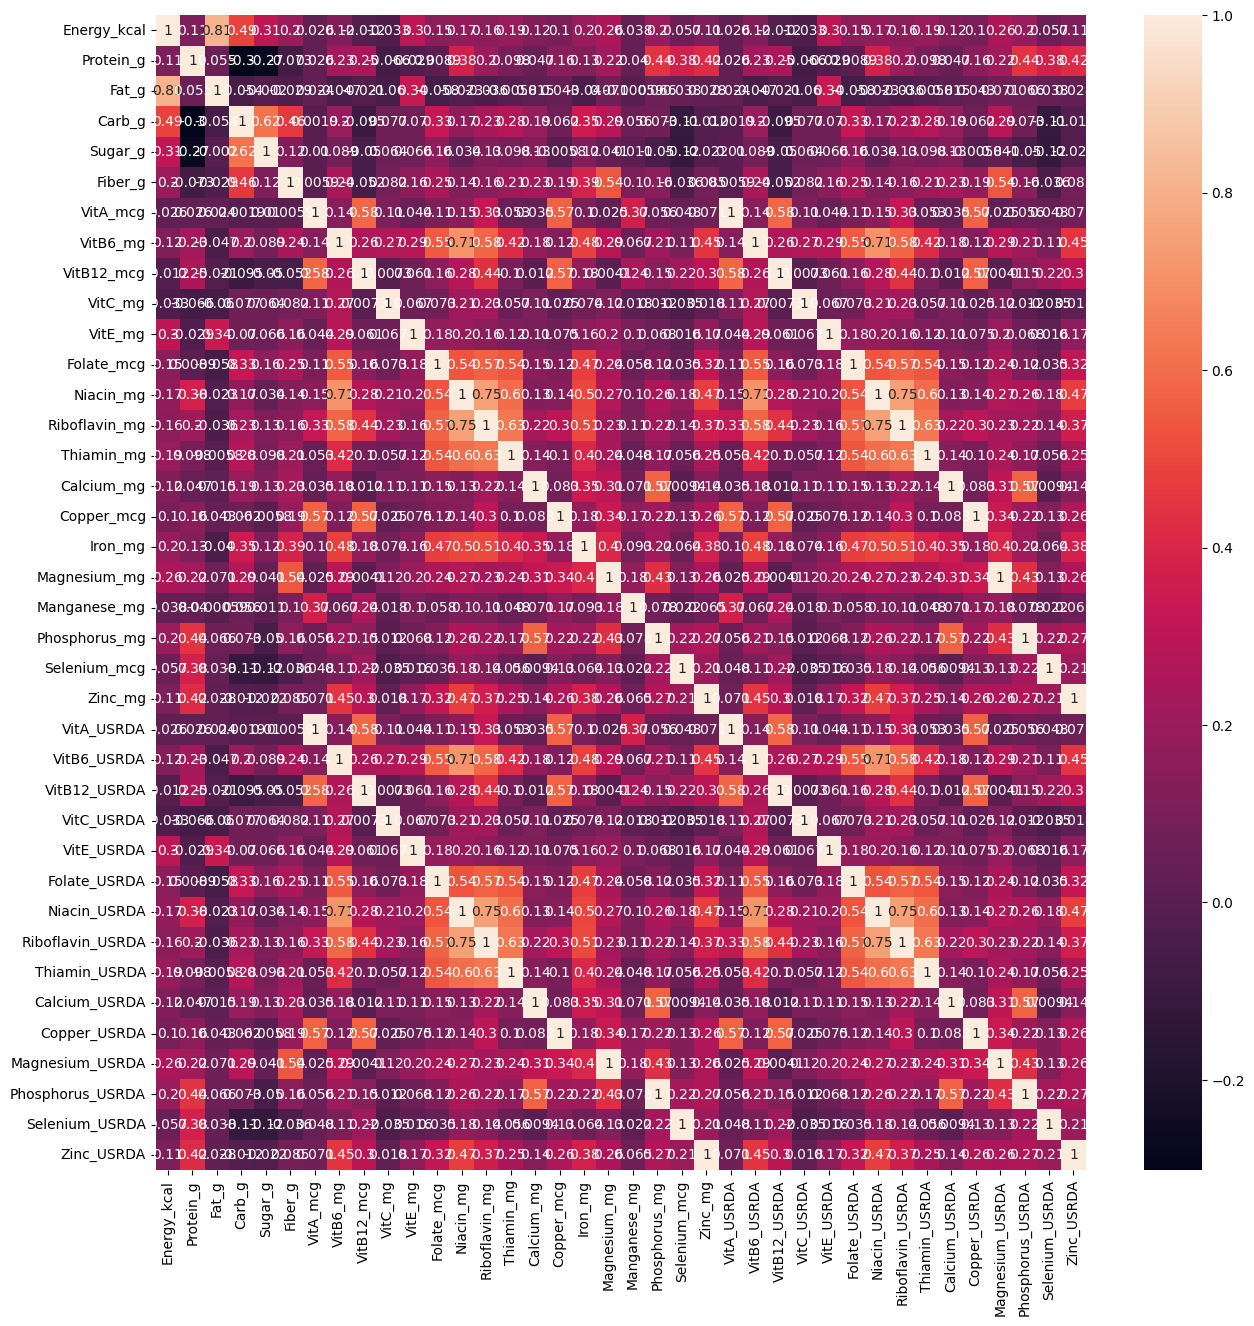

In [53]:
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr(), annot= True);

In [55]:
df['VitA_USRDA'].max()

33.333333333333336

In [56]:
df['VitA_USRDA'].min()

0.0

In [58]:
df['VitA_mcg'].min()

0.0

In [59]:
df['VitA_mcg']

30000.0

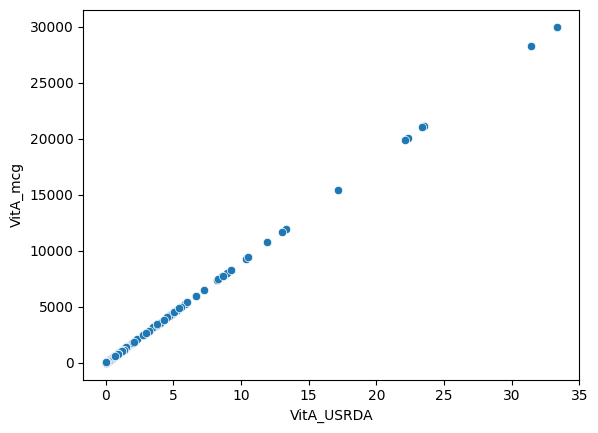

In [61]:
sns.scatterplot(x = df['VitA_USRDA'], y = df['VitA_mcg']);

In [67]:
df

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,0.00,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,5.41,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,73.14,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,2.00,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


In [64]:
df.columns[df.columns.str.contains('USRDA')]

Index(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA'],
      dtype='object')

In [65]:
df.drop(columns= df.columns[df.columns.str.contains('USRDA')], inplace= True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FoodGroup       8618 non-null   object 
 1   ShortDescrip    8618 non-null   object 
 2   Descrip         8618 non-null   object 
 3   CommonName      1063 non-null   object 
 4   MfgName         1560 non-null   object 
 5   ScientificName  732 non-null    object 
 6   Energy_kcal     8618 non-null   float64
 7   Protein_g       8618 non-null   float64
 8   Fat_g           8618 non-null   float64
 9   Carb_g          8618 non-null   float64
 10  Sugar_g         8618 non-null   float64
 11  Fiber_g         8618 non-null   float64
 12  VitA_mcg        8618 non-null   float64
 13  VitB6_mg        8618 non-null   float64
 14  VitB12_mcg      8618 non-null   float64
 15  VitC_mg         8618 non-null   float64
 16  VitE_mg         8618 non-null   float64
 17  Folate_mcg      8618 non-null   f

### Variables no numéricas
Elimina las variables de texto del dataset

In [74]:
df = df.select_dtypes(exclude= ['object'])

In [73]:
df

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

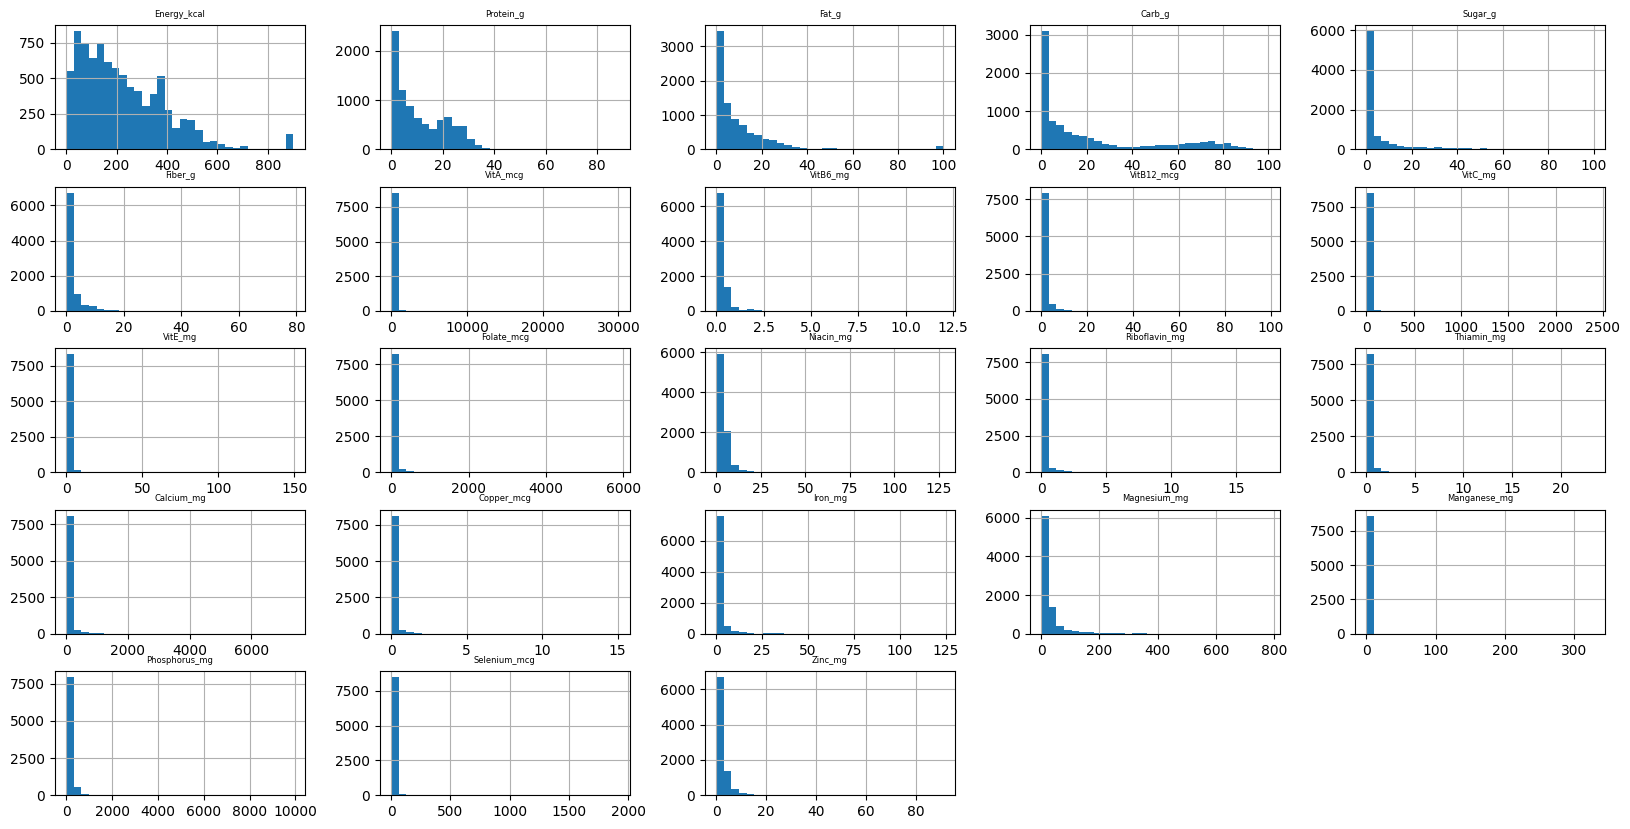

In [75]:
fig = df.hist(bins=30, figsize=(20, 10))
[x.title.set_size(6) for x in fig.ravel()];

In [89]:
df_log = np.log1p(df)

In [92]:
df_log

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.157004,0.0,...,0.033435,0.004988,3.218876,0.000000,0.019803,1.098612,0.000000,3.218876,0.693147,0.086178
1,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.122218,0.0,...,0.033435,0.004988,3.218876,0.015873,0.148420,1.098612,0.003992,3.178054,0.693147,0.048790
2,6.776507,0.246860,4.609959,0.000000,0.000000,0.0,6.734592,0.001000,0.009950,0.0,...,0.004988,0.001000,1.609438,0.001000,0.000000,0.000000,0.000000,1.386294,0.000000,0.009950
3,5.869297,3.109061,3.392493,1.205971,0.405465,0.0,5.293305,0.153579,0.797507,0.0,...,0.323532,0.028587,6.270988,0.039221,0.270027,3.178054,0.008960,5.961005,2.740840,1.297463
4,5.918894,3.188004,3.423611,1.332366,0.412110,0.0,5.680173,0.062975,0.815365,0.0,...,0.300845,0.013903,6.514713,0.023717,0.357674,3.218876,0.011929,6.113682,2.740840,1.280934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,5.723585,2.970414,3.261935,0.000000,0.000000,0.0,3.871201,0.343590,2.564949,0.0,...,0.173953,0.019803,4.204693,0.095310,0.875469,4.110874,0.000000,5.541264,4.309456,0.741937
8614,4.718499,3.069912,0.609766,1.857859,0.000000,0.0,1.098612,0.106160,1.147402,0.0,...,0.023717,0.011929,2.397895,0.032467,0.457425,3.637586,0.028587,6.056784,3.122365,0.936093
8615,5.598422,0.000000,0.000000,4.305955,4.306764,0.0,0.000000,0.000000,0.000000,0.0,...,0.058269,0.122218,2.639057,0.019803,1.526056,2.397895,0.000000,2.197225,0.530628,0.173953
8616,4.510860,2.839078,0.875469,1.098612,0.000000,0.0,3.433987,0.122218,0.405465,0.0,...,0.113329,0.009950,2.397895,0.336472,1.504077,5.525453,0.000000,5.609472,3.346389,0.693147


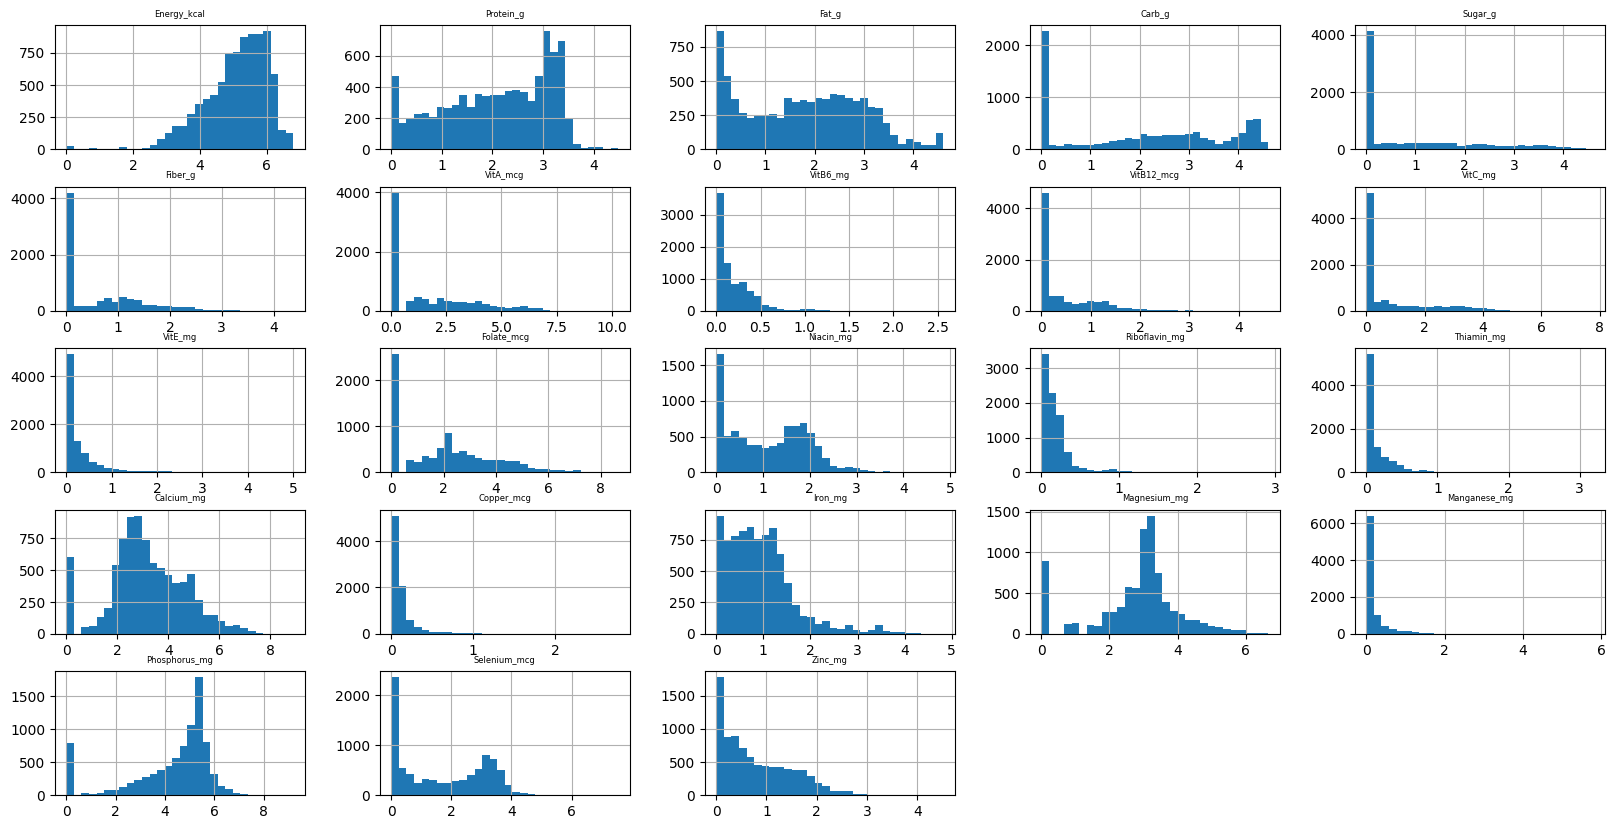

In [94]:
fig = df_log.hist(bins=30, figsize=(20, 10))
[x.title.set_size(6) for x in fig.ravel()];

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [96]:
X = df_log

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()
df_log_scal = scaler.fit_transform(df_log)

In [99]:
df_log_scal

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [100]:
from sklearn.decomposition import PCA

In [108]:
df_log_scal.shape

(8618, 23)

In [112]:
pca = PCA(n_components= 23)
pca.fit(df_log_scal)

PCA(n_components=23)

In [106]:
pca.components_.shape

(23, 23)

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [128]:
pca.components_.shape

(23, 23)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


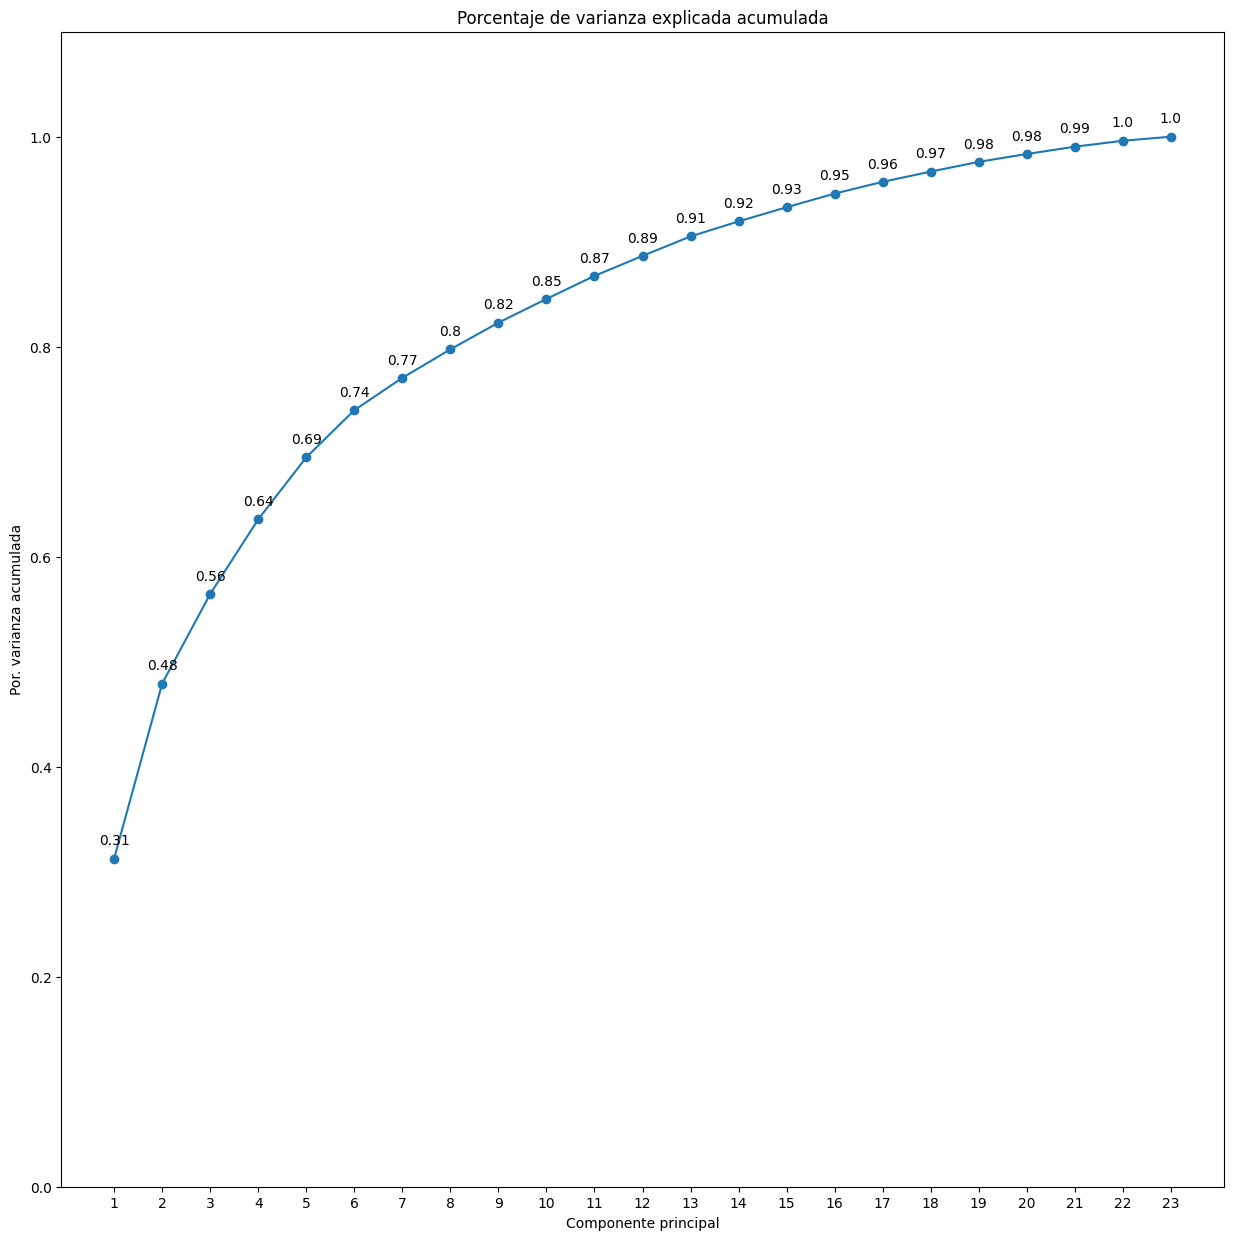

In [116]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.plot(
    np.arange(23) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(23) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [123]:
prop_varianza_acum[5]

0.7395389215549493

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [124]:
pca_6 = PCA(n_components=6)
pca_6.fit(X)

df_pca = pca_6.transform(X)

In [134]:
pca_6.components_.shape

(6, 23)

In [131]:
pca.explained_variance_

array([7.18858937, 3.83374047, 1.9626382 , 1.63589015, 1.35819967,
       1.03231127, 0.70837049, 0.62536385, 0.58366083, 0.52038727,
       0.50482228, 0.43827317, 0.42615271, 0.32951884, 0.3104666 ,
       0.29854271, 0.25769498, 0.22415104, 0.21382194, 0.17182004,
       0.15963602, 0.13025079, 0.08836646])

In [136]:
pd.DataFrame(data = df_pca, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.657035,0.422264,4.790774,-3.637714,-1.280056,-2.079942
1,-0.667332,0.440361,4.779718,-3.638660,-1.295405,-2.088095
2,-3.229269,0.281916,5.439160,-4.517721,-2.295904,-1.674012
3,4.324562,0.188210,2.569800,-1.710885,0.809893,-2.454142
4,4.298475,0.309288,2.808229,-2.221201,1.314923,-2.421028
...,...,...,...,...,...,...
8613,3.836340,-2.232901,2.421613,-0.881552,-0.296954,-0.962246
8614,1.583748,-1.758255,-0.077090,1.658204,0.037141,0.463921
8615,-4.027257,2.204510,-2.434095,-1.255996,0.347668,0.829817
8616,2.403023,-1.322774,1.725372,0.453754,0.378548,1.245070
